In [1]:
import pandas as pd
import os
import caselawnet
import sqlalchemy
%matplotlib inline
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /home/dafne/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
filepath =  '/media/sf_VBox_Shared/CaseLaw/2018-01-29-lido/derived'

In [3]:
cases_links = pd.read_csv(os.path.join(filepath, 'case_to_case_lx_links.csv'))

In [7]:
art_links = pd.read_csv(os.path.join(filepath, 'case-to-article-links-unique.csv'))

In [8]:
art_links.head()

,source,target
0,http://linkeddata.overheid.nl/terms/jurisprude...,http://linkeddata.overheid.nl/terms/bwb/id/BWB...
1,http://linkeddata.overheid.nl/terms/jurisprude...,http://linkeddata.overheid.nl/terms/bwb/id/BWB...
2,http://linkeddata.overheid.nl/terms/jurisprude...,http://linkeddata.overheid.nl/terms/bwb/id/BWB...
3,http://linkeddata.overheid.nl/terms/jurisprude...,http://linkeddata.overheid.nl/terms/bwb/id/BWB...
4,http://linkeddata.overheid.nl/terms/jurisprude...,http://linkeddata.overheid.nl/terms/bwb/id/BWB...


In [4]:
cases_links.head()

,link_id,source,target
0,http://localhost:8984/bigdata/namespace/Regell...,http://linkeddata.overheid.nl/terms/jurisprude...,http://linkeddata.overheid.nl/terms/jurisprude...
1,http://localhost:8984/bigdata/namespace/Regell...,http://linkeddata.overheid.nl/terms/jurisprude...,http://linkeddata.overheid.nl/terms/jurisprude...
2,http://localhost:8984/bigdata/namespace/Regell...,http://linkeddata.overheid.nl/terms/jurisprude...,http://linkeddata.overheid.nl/terms/jurisprude...
3,http://localhost:8984/bigdata/namespace/Regell...,http://linkeddata.overheid.nl/terms/jurisprude...,http://linkeddata.overheid.nl/terms/jurisprude...
4,http://localhost:8984/bigdata/namespace/Regell...,http://linkeddata.overheid.nl/terms/jurisprude...,http://linkeddata.overheid.nl/terms/jurisprude...


In [9]:
case_lido_ids = list(set(cases_links['source']).union(set(cases_links['target'])).union(set(art_links['source'])))
case_ecli = [s.split('/')[-1] for s in case_lido_ids]

In [10]:
len(case_ecli)

502692

In [11]:
cases_df = pd.DataFrame({'lido_id': case_lido_ids, 'ecli': case_ecli})
cases_df.head()

,ecli,lido_id
0,ECLI:NL:GHSGR:2010:BM2753,http://linkeddata.overheid.nl/terms/jurisprude...
1,ECLI:NL:RBHAA:2007:BC0491,http://linkeddata.overheid.nl/terms/jurisprude...
2,ECLI:NL:RBMAA:2007:BC1654,http://linkeddata.overheid.nl/terms/jurisprude...
3,ECLI:NL:CRVB:2016:4389,http://linkeddata.overheid.nl/terms/jurisprude...
4,ECLI:NL:RBLIM:2014:11172,http://linkeddata.overheid.nl/terms/jurisprude...


In [12]:
meta_df = pd.DataFrame([e.split(':')[1:4] for e in case_ecli], columns=['country', 'court', 'year'])
meta_df.head()

,country,court,year
0,NL,GHSGR,2010
1,NL,RBHAA,2007
2,NL,RBMAA,2007
3,NL,CRVB,2016
4,NL,RBLIM,2014


In [13]:
cases_df = pd.concat([cases_df, meta_df], axis=1)

In [14]:
cases_df.head()

,ecli,lido_id,country,court,year
0,ECLI:NL:GHSGR:2010:BM2753,http://linkeddata.overheid.nl/terms/jurisprude...,NL,GHSGR,2010
1,ECLI:NL:RBHAA:2007:BC0491,http://linkeddata.overheid.nl/terms/jurisprude...,NL,RBHAA,2007
2,ECLI:NL:RBMAA:2007:BC1654,http://linkeddata.overheid.nl/terms/jurisprude...,NL,RBMAA,2007
3,ECLI:NL:CRVB:2016:4389,http://linkeddata.overheid.nl/terms/jurisprude...,NL,CRVB,2016
4,ECLI:NL:RBLIM:2014:11172,http://linkeddata.overheid.nl/terms/jurisprude...,NL,RBLIM,2014


In [19]:
cases_df.country.value_counts()

NL    452726
CE     44883
EU      5082
Name: country, dtype: int64

In [20]:
cases_df.court.value_counts()[:20]

RVS      61888
CRVB     57998
ECHR     44883
HR       44113
PHR      22394
GHAMS    22175
RBAMS    18396
RBSGR    16925
GHSHE    16819
RBROT    13398
RBDHA    11419
RBARN    10057
GHARL     9956
GHSGR     9245
RBUTR     9016
GHARN     8834
CBB       8032
RBHAA     7571
GHLEE     6949
RBGEL     6654
Name: court, dtype: int64

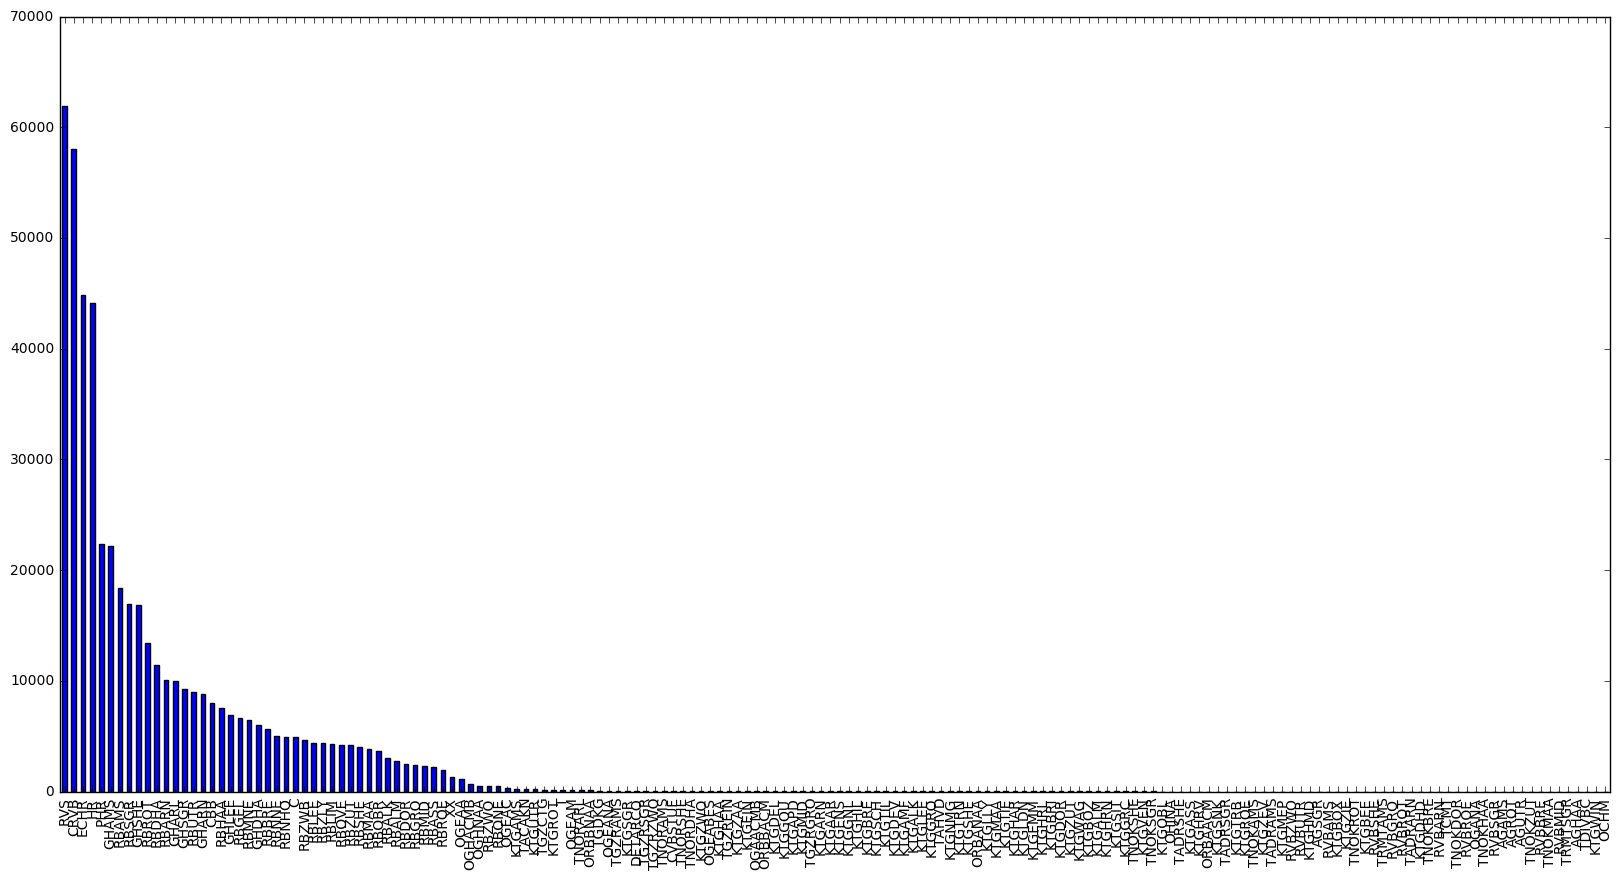

In [21]:
plt.figure(figsize=(20, 10))
cases_df.court.value_counts().plot(kind='bar')

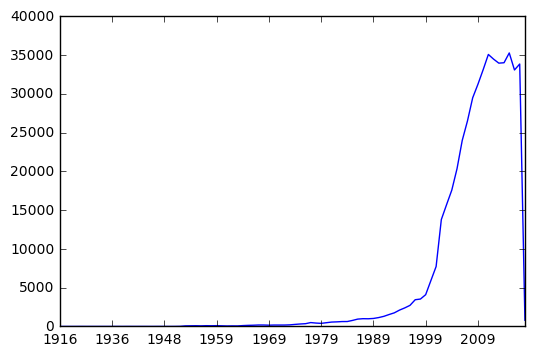

In [22]:
cases_df.year.value_counts(sort=False).sort_index().plot()

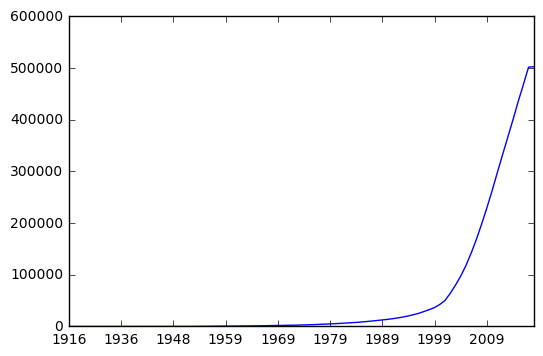

In [23]:
cases_df.year.value_counts(sort=False).sort_index().cumsum().plot()

In [24]:
cases_df.to_csv(os.path.join(filepath, 'case_nodes_simple.csv'), index=False)

## From database

In [26]:
import zipfile

In [30]:
rootpath = '/media/sf_VBox_Shared/CaseLaw/OpenDataUitspraken-maart/'

In [3]:
dbpath = 'sqlite:////media/sf_VBox_Shared/CaseLaw/caselaw2018.db'
session = caselawnet.dbutils.get_session(adress=dbpath)

In [ ]:
# Fill database with necessary nodes
for dir0 in os.listdir(rootpath):
    print("Processing directory", dir0)
    dir0 = os.path.join(rootpath, dir0)
    if os.path.isdir(dir0):
        for dir1 in os.listdir(dir0):
            dir1 = os.path.join(dir0, dir1)
            if zipfile.is_zipfile(dir1):
                zf = zipfile.ZipFile(dir1, 'r')
                for n in zf.namelist():
                    ecli = n.split('.')[0].replace('_', ':')
                    if ecli in case_ecli:
                        caselawnet.dbutils.file_to_db(n, session, zf)

Processing directory 1987
Processing directory 1988
Processing directory 1989
Processing directory 1990
Processing directory 1991
Processing directory 1992
Processing directory 1993
Processing directory 1994
Processing directory 1995
Processing directory 1996
Processing directory 1997
Processing directory 1998
Processing directory 1999
Processing directory 2000
ECLI_NL_RBMAA_2000_AA6975.xml [Errno 71] Protocol error
ECLI_NL_RBMAA_2000_AA7188.xml [Errno 71] Protocol error
ECLI_NL_RBMAA_2000_AA7323.xml [Errno 71] Protocol error
ECLI_NL_RBMAA_2000_AH8219.xml [Errno 71] Protocol error
ECLI_NL_RBMID_2000_AA7948.xml [Errno 71] Protocol error
ECLI_NL_RBROE_2000_AA6789.xml [Errno 71] Protocol error
ECLI_NL_RBROE_2000_AA7139.xml [Errno 71] Protocol error
ECLI_NL_RBROE_2000_AA8230.xml [Errno 71] Protocol error
ECLI_NL_RBROT_2000_AA6826.xml [Errno 71] Protocol error
ECLI_NL_RBROT_2000_AA6858.xml [Errno 71] Protocol error
ECLI_NL_RBROT_2000_AA6924.xml [Errno 71] Protocol error
ECLI_NL_RBROT_2000_A

In [57]:
caselawnet.enrich_eclis(['ECLI:NL:PHR:1984:AC8323'], rootpath='/media/sf_VBox_Shared/CaseLaw/OpenDataUitspraken/', db_session=session)

Retrieved ECLI:NL:PHR:1984:AC8323 from database


[{'abstract': '',
  'articles': [],
  'count_annotation': 0,
  'count_version': 0,
  'creator': 'http://standaarden.overheid.nl/owms/terms/Parket_bij_de_Hoge_Raad',
  'date': '1984-02-28',
  'ecli': 'ECLI:NL:PHR:1984:AC8323',
  'id': 'http://deeplink.rechtspraak.nl/uitspraak?id=ECLI:NL:PHR:1984:AC8323',
  'subject': '',
  'title': ''}]

In [6]:
session.execute('select max(date) from cases').fetchall()

[('1987-04-29',)]